*Supporting textbook chapters for week 6: Chapters 8.1, 8.2, 8.5.1 to 8.5.3*

Lecture 6, topics:
* Euler method
* Runge-Kutta methods
* Leapfrog and Verlet Methods --- energy conservation

# Intro

Consider ODE(s) with some initial condition(s):
* 1D: $\quad\displaystyle \frac{dx}{dt} = f(x, t)\quad \text{with}\quad x(t=0)=x_0.$

* $n$D: $\quad\displaystyle \frac{dx_i}{dt} = f_i(x_1,\dots{},x_n, t)\quad \text{with}\quad x_i(t=0)=x_{i0}.$

* higher order, e.g.: 
$$\frac{d^3 x}{dt^3} =f(x, t)\quad \Leftrightarrow \quad \frac{d x}{dt} = v,\ \frac{dv}{dt} = a,\ \frac{d a}{dt }=f.$$

These equations can be impossible to solve anaytically, but easy to solve on a computer.

## `odeint`

* Python has a built in ODE solver called `odeint` located in the `scipy.integrate` module. (*Aside: This module also contains a bunch of integration functions that can do Gaussian quadrature, Simpson's rule etc.*). 

* See http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

* Functions as a black box and you don't know how accurate your solution is (you don't know what method was used).  

* If that doesn't matter to your specific application, then just use `odeint`. However, if it does matter, then you can write your own ODE solver with the method that you want.

# Euler method

Let's solve for 
$$ \frac{dx}{dt} = -x^3(t) + \sin(t) $$

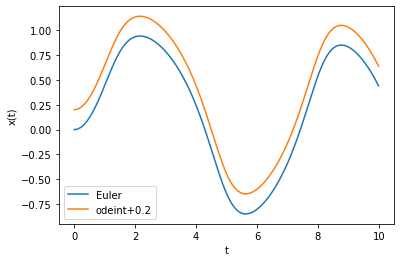

In [5]:
# %load euler-odeint.py
#do euler.py solution for odeint
from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show, legend
from scipy.integrate import odeint

def f(x,t):
    return -x**3 + sin(t)

a = 0.0           # Start of the interval
b = 10.0          # End of the interval
N = 1000          # Number of steps
h = (b-a)/N       # Size of a single step
x = 0.0           # Initial condition

tpoints = arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

#also solve by odeint
x_new = odeint(func=f, y0=0, t=tpoints)

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
plot(tpoints,x_new+0.2)
legend(('Euler','odeint+0.2'))
show()


In [6]:
figure()  # NG
plot(tpoints, xpoints, label='Euler')
xlabel("t")
ylabel("x(t)")
plot(tpoints, x_new+0.2, '--', label='odeint+0.2')  # PJK
autoscale(enable=True, axis='x', tight=True)  # NG
grid()  # NG
legend()

NameError: name 'figure' is not defined

* The Euler method has error $O(h^2)$ at each step (error $=O(h^2)$),
* integrating across the whole interval: global error is $O(h)$ (see eqn. (8.8) of textbook):
    $$\text{Taylor expansion}\Rightarrow x(t+h) = x(t) + h\frac{dx}{dt} + \overbrace{\frac{h^2}{2}\frac{d^2x}{dt^2}}^{\epsilon} + O(h^3)$$
    $$\sum\epsilon = \sum_{k=0}^{N-1}\frac{h^2}{2}\left.\frac{d^2x}{dt^2}\right|_{x_k, t_k} = \frac{h}{2}\sum_{k=0}^{N-1}h\left.\frac{df}{dt}\right|_{x_k, t_k}\\
    \approx \frac{h}2\int_a^b\frac{df}{dt}dt = \frac{h}{2}\left[f_b - f_a\right]$$
* We can do better!

# Runge-Kutta methods

## 2nd-order Runge-Kutta (RK2) method

![Newman's Fig. 8.2](fig8-2.png)

* Use the middle point, $t+h/2$,
* Evaluate with Euler's method, 

$\quad\displaystyle x\left(t + \frac{h}2\right) \approx x(t) + \frac{h}2 f[x(t), t]$

* Slope at $t + \frac{h}2 \approx f \! \left[ x(t) + \frac{h}2 f\left[x(t), t\right], t + \frac{h}2\right]$

$\displaystyle \Rightarrow \boxed{x(t+h) = x(t) + h f\! \left[x(t) + \frac{h}2 f[x(t), t], t+\frac{h}2\right]}$

RK2 usually coded by defining intermediate quantities:
* $k_1 = hf(x, t)$ as preliminary step before $x(t+h/2)$,
* $\displaystyle k_2 = hf\left(x + \frac{k_1}{2}, t+\frac{h}2\right)$,
* $x(t+h) = x(t) + k_2$.

**RK2: $O(h^3)$ step-by-step error, usually $O(h^2)$ global error.**

Coding Euler:

In [ ]:
for t in tpoints:
    x += h*f(x, t)

Coding RK2:

In [ ]:
for t in tpoints:
    k1 = h*f(x, t)
    k2 = h*f(x + 0.5*k1, t+0.5*h)
    x += k2

## 4th-order Runge-Kutta method (RK4)

* Perform various Taylor expansions at various points in the interval $\Rightarrow$ higher-order RK's.
* RK4 is usually a very good compromise to code oneself. Higher-order methods come in canned routines.
* If Newman says the algebra is tedious, it has got to be.
* End result:
    * $k_1 = hf(x, t)$,
    * $k_2 = hf\left(x + \frac{k_1}{2}, t+\frac{h}2\right)$,
    * $k_3 = hf\left(x + \frac{k_2}{2}, t+\frac{h}2\right)$,
    * $k_4 = hf\left(x + k_3, t + h \right)$,
    * $x(t+h) = x(t) + \frac{1}{6}(k_1 + 2 k_2 + 2k_3 + k_4)$.

Coding Euler:

In [ ]:
for t in tpoints:
    x += h*f(x, t)

Coding RK2:

In [ ]:
for t in tpoints:
    k1 = h*f(x, t)
    k2 = h*f(x + 0.5*k1, t+0.5*h)
    x += k2

Coding RK4:

In [ ]:
for t in tpoints:
    k1 = h*f(x, t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    x += (k1 + 2*k2 + 2*k3 + k4)/6

* RK4 carries $O(h^4)$ error globally,
* Many small things to keep track of: easy to introduce a coding error!

# Leapfrog methods

* RK2: Use mid-point location as clutch to jump to $t+h$, and restart.

$$ x(t+h) = x(t) + h f \left[ x + \frac{h}2 f(x, t), t+ \frac{h}2 \right] $$

* Leapfrog: use each point as a mid-point.

$$\displaystyle x(t+h) = x(t) +  h f \! \left[ x + \frac{h}2 f(x, t), t + \frac{h}2 \right],$$

$$\displaystyle x\left(t+\frac{3}{2}h\right) = x\left(t + \frac{h}2\right) + hf[x(t+h), t+h].$$

![Newman's fig. 8.9](fig8-9.png)

* Also $O(h^2)$ global error,
* Not RK4-able. Not trivially at least (cf. Yoshida algorithms).
* So, is it just cute?

* No: it is **time-reversible**!
* Emmy Noether (from Wikipedia):
> If a system has a continuous symmetry property, then there are corresponding quantities whose values are conserved in time.
* Invariance in time of the laws of Physics $\Rightarrow$ conservation of energy.
* **Leapfrog timestepping is reversible!**

**Leapfrog timestepping is reversible!**

Forward leapfrog:

$x(t+h) = x(t) + hf\left(x\left(t + \frac{h}2\right), t+ \frac{h}2\right),$

$x\left(t+\frac{3}{2}h\right) = x\left(t + \frac{h}2\right) + hf(x(t+h), t+h).$

Backward Leapfrog: $h \to -h$

$x(t-h) = x(t) - hf\left(x\left(t - \frac{h}2\right), t - \frac{h}2\right),$

$x\left(t - \frac{3}{2}h\right) = x\left(t - \frac{h}2\right) - hf(x(t-h), t-h).$

Shift things in time (just to reveal the similarity): $t \to t+3h/2$

$x\left(t+\frac{h}2\right) = x\left(t + \frac32 h\right) - hf\left(x\left(t + h\right), t + h\right),$

$x\left(t\right) = x\left(t + h\right) - hf\left(x\left(t+\frac{h}2\right), t+\frac{h}2\right).$

**Doesn't work with RK2**

Forward RK2:

$x\left(t + \frac{h}2\right) = x(t) + \frac{h}2 f(x(t), t)$

$x(t+h) = x(t) + h f\left(x\left(t + \frac{h}{2}\right), t+\frac{h}2\right)$

Backward RK2: $h \to -h$

$x\left(t - \frac{h}2\right) = x(t) - \frac{h}2 f(x(t), t)$

$x(t-h) = x(t) - h f\left(x\left(t - \frac{h}2\right), t-\frac{h}2\right)$

Shift things in time (just to reveal the similarity): $t \to t+h$

$x\left(t + \frac{h}2\right) = x\left(t + h\right) - \frac{h}2 f\left(x\left(t + h\right), t+h\right)$

$x\left(t\right) = x\left(t + h\right) - h f\left(x\left(t + \frac{h}2\right), t+\frac{h}2\right)$

* Because everything gets "reset" at $t+h$, the info at the mid-point is lost and the RK2 reverse path is not a "retracing of the steps".
* Graphically, reverse RK2 is not like drawing the arrows in reverse on the top panel of Newman's figure:

![Newman's fig. 8.9](fig8-9.png)

**Energy of a nonlinear pendulum:**

![Newman's Fig. 8.10](fig8-10.png)

# Leapfrog to Verlet

* Leapfrog:
$$x(t+h) = x(t) + h f \! \left[ x\left(t + \frac{h}2\right), t+ \frac{h}2\right],$$
$$x\left(t+\frac{3}{2}h\right) = x\left(t + \frac{h}2\right) + hf[x(t+h), t+h].$$

* Extension to two (or $n$) coupled ODEs: cf. §§ 8.2, 8.3 in textbook.

* Verlet is for the special case of two coupled ODEs, with LHS and RHS having separated variables. Like for Newton's 2nd law:
$$\frac{d^2 x}{dt^2} = \frac{F(x, t)}m \quad \Rightarrow \quad \frac{dx}{dt} = v\quad \text{and}\quad \frac{dv}{dt} = \frac{F(x, t)}{m}.$$
1st ODE: $x$ on LHS, $v$ on RHS; 2nd ODE: $v$ on LHS, $x$ on RHS.

* Verlet method:
$$x(t+h) = x(t) + hv\left(t+ \frac{h}2\right),$$
$$v\left(t+\frac{3}{2}h\right) = v\left(t + \frac{h}2\right) + h\frac{F(x(t+h), t+h)}m.$$

* Verlet is a 2-variable leapfrog method at 1/2 the cost.
* It conserves energy too.
* If diagnostics (like energy) are needed at specific time steps, we need to recompute the half-step quantities.

**RK2:**
* $\oplus$ Easily extended to RK4
* $\oplus$ Possible to use adaptive time step (see next week)
* $\ominus$ not time-reversible
* $\ominus$ not accurate

**RK4:**
* $\oplus$ accuracy
* $\oplus$ Possible to use adaptive time step (see next week)
* $\ominus$ not time-reversible

**Leapfrog:**
* $\oplus$ time-reversible
* $\oplus$ basis for higher-order methods (Bulirsch-Stoer, see next week)
* $\ominus$ not accurate
* $\ominus$ time step has to be constant.